<a href="https://colab.research.google.com/github/Fatimah007/T5/blob/main/YOLO_Practical_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Traffic Vehicle Counting Exam

In this exam, you will use the YOLO (You Only Look Once) object detection model to analyze a video of road traffic. Your primary task is to count the number of vehicles exiting the road at each of the four exits (located at the top, bottom, left, and right of the frame). The video for this task is provided at `Datasets/YOLO_Exam_Video.mp4`.

## Objectives
- Load and process the video using OpenCV.
- Utilize the YOLO model to detect vehicles in each frame.
- Manipulate the video frames using OpenCV.
- Track vehicles as they move across the video frames.
- Count the number of vehicles exiting via the top street.
- Count the number of vehicles exiting via the bottom street.
- Count the number of vehicles exiting via the left street.
- Count the number of vehicles exiting via the right street.


## Setup Environment

Before you begin, ensure you have the necessary libraries installed. You will need `opencv`, and `ultralytics` among others.
If these are not installed, you should install them.

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 14.8 MB/s eta 0:00:00


In [3]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()

## Load the YOLO Model

You will first need to load the YOLO model, there is a custom model for this exam called `YOLO_Model.pt` under Datasets file ⚠️ PLEASE USE THIS MODEL AND DO NOT USE ANY OTHER MODEL ⚠️.
Write the code to load the YOLO model below:

In [6]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO("/content/YOLO_Model.pt")

# Display model information (optional)
model.info()

Model summary: 365 layers, 68,156,460 parameters, 0 gradients, 258.1 GFLOPs


(365, 68156460, 0, 258.13867519999997)

## Prepare the Video Capture

Create a variable to capture the video frames, you can use `cv2.VideoCapture()` to achive this.

In [28]:
# Open the input video
# Ensure that the file name and path are correct and the video exists at the specified location
video_path = '/content/YOLO_Video.mp4'  # Path to the input video file
cap = cv2.VideoCapture(video_path)  # Use OpenCV's VideoCapture method to open the video

In [ ]:
#Pre-trained YOLOv8

In [7]:
!pip install gdown

import gdown
file_id = "18XVAf6x4_UWENPLwpimJA-Y1q9pqFXPQ"
url = f"https://drive.google.com/uc?id={file_id}"
output_path = "/content/YOLO_Video.mp4"
gdown.download(url, output_path, quiet=False)
print(f"Video downloaded successfully to {output_path}!")

Downloading...
From: https://drive.google.com/uc?id=18XVAf6x4_UWENPLwpimJA-Y1q9pqFXPQ
To: /content/YOLO_Video.mp4
100%|██████████| 1.54M/1.54M [00:00<00:00, 78.0MB/s]

Video downloaded successfully to /content/YOLO_Video.mp4!


In [ ]:
#YOLO using CLI

In [29]:
# Using the YOLO CLI, we can run the following command to detect and classify objects in an image:

!yolo task=detect mode=predict model=YOLO_Model.pt conf=0.25 source='https://c7.alamy.com/comp/CEWYFH/ford-mondeo-on-road-speed-CEWYFH.jpg'

Ultralytics YOLOv8.2.85 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs

95.9kB [00:00, 485kB/s]
image 1/1 /content/ford-mondeo-on-road-speed-CEWYFH.jpg: 480x640 10 cars, 2 trucks, 1 van, 3444.3ms
Speed: 3.7ms preprocess, 3444.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


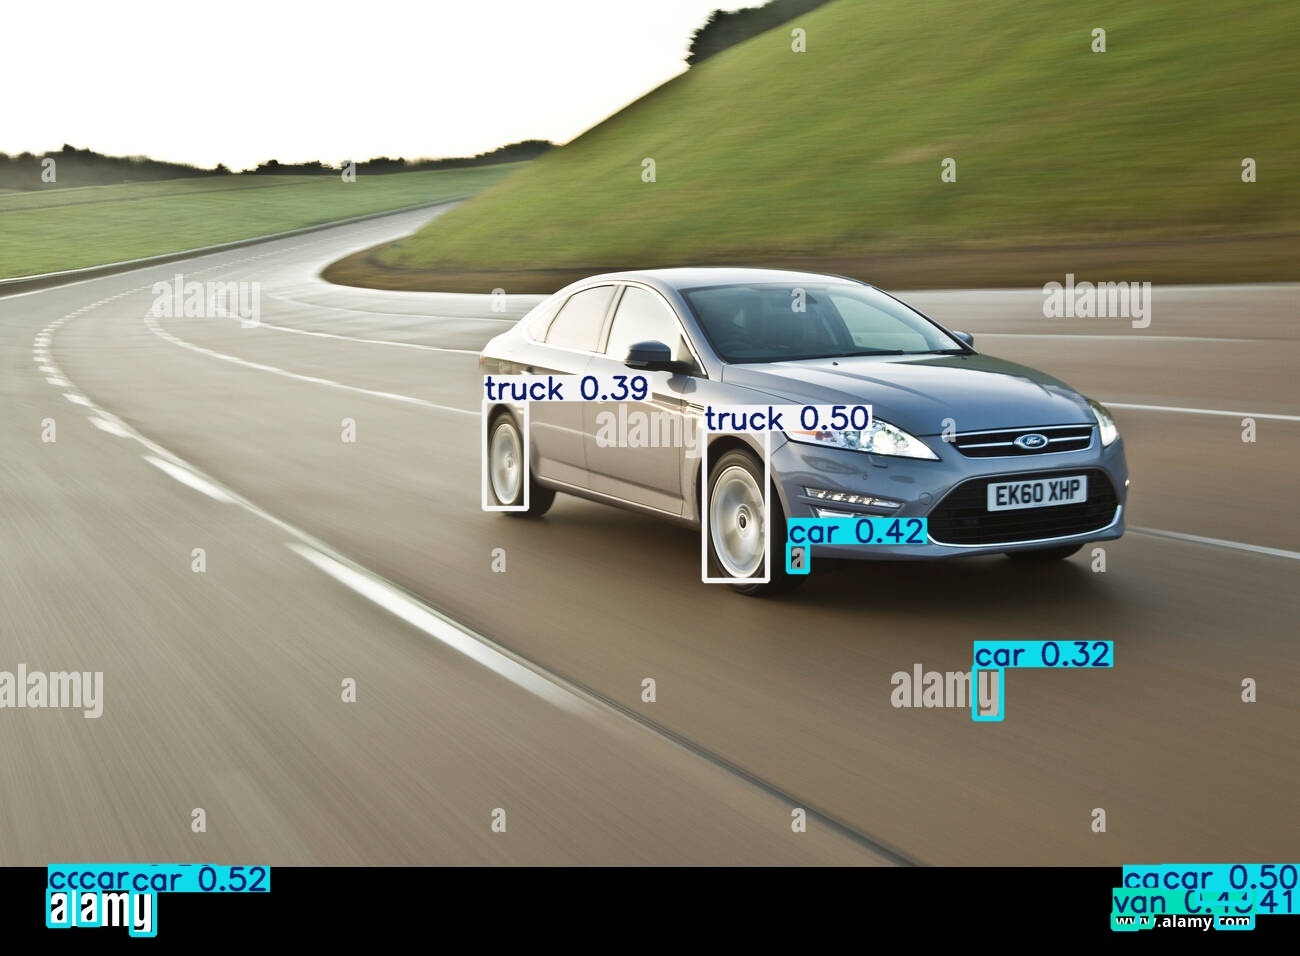

In [31]:
# It will be saved to content/runs/detect/predict2
Image(filename='/content/runs/detect/predict2/ford-mondeo-on-road-speed-CEWYFH.jpg', height=600)

In [ ]:
#YOLO and OpenCV

## Get Video Information

You can use `cv2` library to get these information fro the `VideoCapture()` variable you created to extract these information:
* `height`: Video's height.
* `width`: Video's width.
* `fps`: Video's frames.

In [ ]:
#Prepare the OpenCV parameters

In [12]:
!pip install opencv-python # Install the OpenCV library
import cv2
# Open the input video
video_path = '/content/YOLO_Video.mp4'  # Path to the video file to be processed
cap = cv2.VideoCapture(video_path)  # Capturing the video using OpenCV's VideoCapture method, which allows you to read the video frame by frame

In [13]:
# Get video details
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Retrieves the width of the video frame
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Retrieves the height of the video frame
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Retrieves the frames per second (FPS) of the video

'\nwidth = int(cap.get(3))  # Property index 3 corresponds to frame width\nheight = int(cap.get(4))  # Property index 4 corresponds to frame height\nfps = int(cap.get(5))  # Property index 5 corresponds to frames per second (FPS)\n'

## Prepare Video Writer to Store the Output

Create a variable that uses `cv2.VideoCapture()` to save the video with the bounding boxes, specified Region of Interest rectangle (ROI) and the counted vehicles on each sides. You will need to make the video with the same `fps`, `width`, `height`, and specify the codec and output path of the video.

In [14]:
# Define the codec and create VideoWriter object to save the output video
output_path = '/content/output_video_with_yolo.mp4'  # Desired output path for the processed video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specifies the codec to be used for the output video file. 'mp4v' is the codec for .mp4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))  # Creates a VideoWriter object to write the output video

In [15]:
ret, frame = cap.read()  # Reads a frame from the video.
# 'ret' is a boolean indicating if the frame was successfully read (True or False).
# 'frame' is the actual frame captured from the video.

results = model(frame)  # Passes the frame to the YOLOv8 model for object detection.
# 'results' contains the detection output, including detected objects, bounding boxes, and class predictions.


0: 384x640 2 cars, 3452.1ms
Speed: 2.4ms preprocess, 3452.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


## Expermint to get the `(x1, y1, x2, y2)` of the ROI

### Hint
When defining the Regions of Interest (ROIs) for detecting vehicles exiting the road, consider the coordinates that outline the relevant areas. These coordinates can be specified as `(x1, y1, x2, y2)`, where `(x1, y1)` is the top-left corner and `(x2, y2)` is the bottom-right corner of the rectangle.

Experiment with different coordinates to accurately cover the streets where vehicles exit. Visualize these ROIs by drawing rectangles on a frame of the video and adjust the coordinates as needed until you capture the desired areas effectively.

In [16]:
results[0].boxes.xyxy.cpu().numpy()  # This line extracts the bounding box coordinates in the [x1, y1, x2, y2] format.


array([[     606.55,     0.31443,      622.25,      14.156],
       [     624.46,     0.43902,      639.89,      10.574]], dtype=float32)

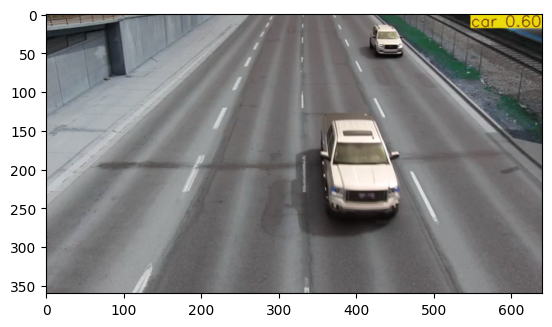

In [17]:
import matplotlib.pyplot as plt  # Importing Matplotlib for displaying images

# Get the annotated frame with detections from the YOLO model
annotated_frame = results[0].plot()  # The 'plot()' method returns the image with bounding boxes and labels drawn on it

# Display the annotated frame using Matplotlib
plt.imshow(annotated_frame)  # Displays the annotated frame as an image in the notebook
plt.show()  # Renders the image to be visible in the output

In [18]:
for result in results:  # Iterates through each detection result (one for each image/frame)
    # Prints the bounding box coordinates in XYXY format
    print("Bounding Box Coordinates (XYXY):\n", result.boxes.xyxy.cpu().numpy(), "\n")
    # The bounding box coordinates are moved to the CPU and converted to a NumPy array, then printed.

    # Prints the confidence scores for each detected object
    print("Confidence Scores:\n", result.boxes.conf.cpu().numpy(), "\n")
    # Confidence scores represent the model's confidence in the detection for each object.
    # These are also moved to the CPU and converted to a NumPy array before printing.

    # Prints the class labels for each detected object
    print("Class Labels:\n", result.boxes.cls.cpu().numpy(), "\n")
    # The class labels correspond to the object classes (e.g., 0 for 'person', 2 for 'car').
    # These are moved to the CPU and converted to a NumPy array for printing.

Bounding Box Coordinates (XYXY):
 [[     606.55     0.31443      622.25      14.156]
 [     624.46     0.43902      639.89      10.574]] 

Confidence Scores:
 [    0.59705     0.35491] 

Class Labels:
 [          1           1] 



## Process Video Frames and Identify Vehicles Left the Road Form Each Street

For each frame in the video, use the YOLO model to detect and track vehicles. You will need to write a loop that processes each frame and applies the YOLO model.

In each frame, after detecting the vehicles, determine whether they exited the road via the top, bottom, left, or right street. You can use the positions of the bounding boxes provided by YOLO to do this.

- The video should display bounding boxes around the detected objects.
- The video should display your name on the top.
- It should display the calculated center of each vehicle.
- The video should display the confidence score, alongside the object ID and class ID of each detected and tracked object.
- The video should display the rectangles representing the regions where you count the vehicles that have crossed and exited.
- The video should display the number of vehicles that exited via the top street.
- The video should display the number of vehicles that exited via the bottom street.
- The video should display the number of vehicles that exited via the left street.
- The video should display the number of vehicles that exited via the right street.

In [20]:
color = (0, 255, 0)  # Green color for bounding boxes
thickness = 2  # Thickness of the bounding box lines

# Process the video frame by frame
while cap.isOpened():  # Loop through the video until all frames are processed
    ret, frame = cap.read()  # Read the next frame from the video
    if not ret:  # If no frame is returned (end of video), break the loop
        break

    # Make YOLO predictions on the current frame
    results = model(frame)

    # Extract the bounding boxes, confidence scores, and class labels from the results
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates as a NumPy array
        confidences = result.boxes.conf.cpu().numpy()  # Get confidence scores for each detected object
        class_ids = result.boxes.cls.cpu().numpy()  # Get class labels for each detected object

        # Iterate through each detection and draw bounding boxes and labels on the frame
        for box, conf, class_id in zip(boxes, confidences, class_ids):
            x1, y1, x2, y2 = map(int, box)  # Convert bounding box coordinates to integers
            label = f'{model.names[int(class_id)]}: {conf:.2f}'  # Create a label with the class name and confidence score

            # Draw the bounding box on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)  # Draw a rectangle around the detected object

            # Put the label above the bounding box
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)  # Display the label

    # Write the processed frame (with bounding boxes) to the output video
    out.write(frame)

# Release the resources once the processing is complete
cap.release()  # Close the video file
out.release()  # Close the output video file



0: 384x640 1 bus, 2 cars, 3430.9ms
Speed: 6.2ms preprocess, 3430.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 3 cars, 2760.4ms
Speed: 2.0ms preprocess, 2760.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 2771.2ms
Speed: 2.6ms preprocess, 2771.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 4 cars, 2837.3ms
Speed: 3.0ms preprocess, 2837.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 1 car, 3897.6ms
Speed: 2.1ms preprocess, 3897.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 2 cars, 2738.5ms
Speed: 2.6ms preprocess, 2738.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 2 cars, 2760.5ms
Speed: 2.1ms preprocess, 2760.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 2756.9ms
Speed: 2.2ms preprocess, 2756.9ms 

In [27]:
# Start training a YOLOv8 model using the Roboflow dataset
# The command to train the YOLOv8 model using the downloaded dataset
!yolo task=detect mode=train model='/content/YOLO_Model.pt' data={dataset.location}/data.yaml epochs=10 imgsz=600

Ultralytics YOLOv8.2.85 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/YOLO_Model.pt, data={dataset.location}/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [39]:
#Evaluate the model
# Specify the path to the saved confusion matrix image.
# Note: The directory will vary based on where the model saves the results after training.
Image(filename='/content/runs/detect/train2/confusion_matrix.png', height=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/confusion_matrix.png'

In [ ]:
# The directory will be different check out the results saving location at the end of the output of the training step
Image(filename='/content/runs/detect/train2/results.png', height=600)

In [38]:
# After training the YOLOv8 model, run predictions on a new image using the trained model.

# The directory for the trained model weights may differ. Check the training step's output to verify the correct path.
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' source='/content/ford-mondeo-on-road-speed-CEWYFH.jpg'

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 736, in entrypoint
    k, v = parse_key_value_pair(a)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 629, in parse_key_value_pair
    assert v, f"missing '{k}' value"
AssertionError: missing 'source' value

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 743, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""}, e)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 440, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'source=' is not a valid YOLO argument. Similar arguments are i.e. ['source'].

    Arguments received: ['yolo', 'task=detect

In [ ]:
# The directory might be different based on the actual location YOLOv8 saved the prediction results.
# Make sure to check the output directory printed at the end of the prediction step and update the path accordingly.
Image(filename="/content/runs/detect/predict3/", height=600)

## Save and Submit Your Work

In [34]:
# Specify the path to the saved confusion matrix image.
# Note: The directory will vary based on where the model saves the results after training.
Image(filename='/content/runs/detect/train2/confusion_matrix.png', height=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/confusion_matrix.png'

In [35]:
# The directory will be different check out the results saving location at the end of the output of the training step
Image(filename='/content/runs/detect/train2/results.png', height=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/results.png'

In [ ]:
# Export the model
Valid_model.export(format='onnx')

In [ ]:
#Some help from this documentation https://docs.ultralytics.com/models/yolov8/

Submit both the notebook and the output video